In [ ]:
 #Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
# Load dataset (replace path with your dataset location)
df = pd.read_csv("car_evaluation.csv")

# Rename columns for clarity
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Preview dataset
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


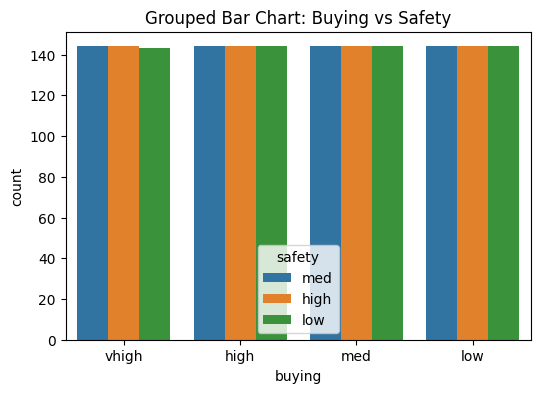

In [ ]:
# -------------------------------
# 1. Categorical vs. Categorical
# -------------------------------

# Example: Buying vs Safety
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="buying", hue="safety")
plt.title("Grouped Bar Chart: Buying vs Safety")
plt.show()

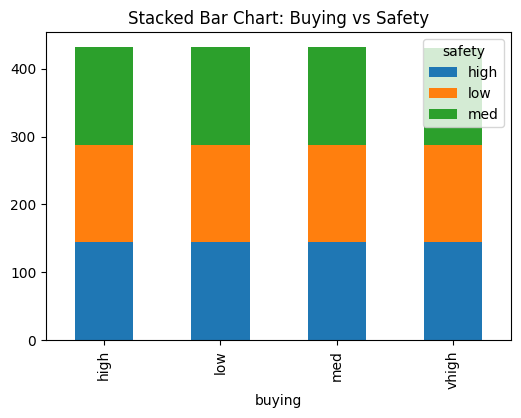

In [ ]:
# Stacked Bar Chart
pd.crosstab(df['buying'], df['safety']).plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("Stacked Bar Chart: Buying vs Safety")
plt.show()

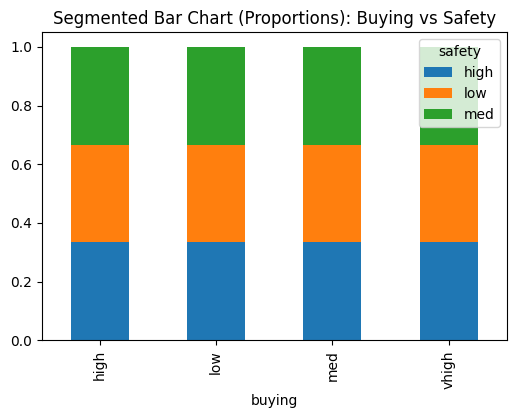

In [ ]:
# Segmented Bar Chart (proportions)
ct = pd.crosstab(df['buying'], df['safety'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title("Segmented Bar Chart (Proportions): Buying vs Safety")
plt.show()


<Figure size 800x600 with 0 Axes>

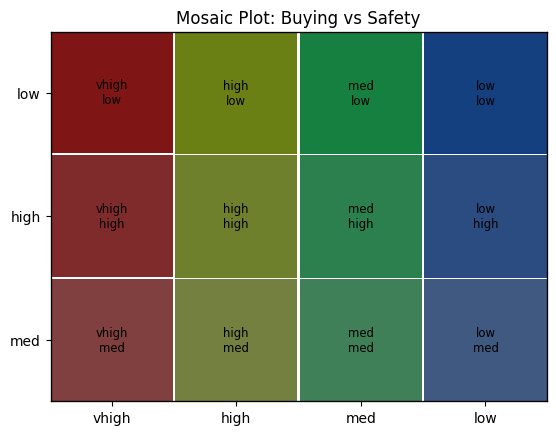

In [ ]:
# Mosaic Plot
plt.figure(figsize=(8,6))
mosaic(df, ['buying','safety'])
plt.title("Mosaic Plot: Buying vs Safety")
plt.show()

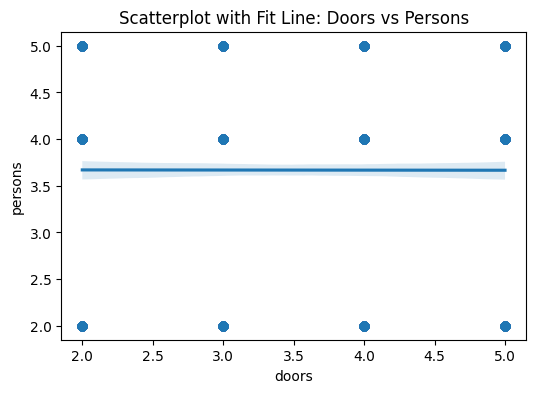

In [ ]:
# -------------------------------
# 2. Continuous vs. Continuous
# -------------------------------

# Suppose dataset has encoded variables like doors, persons as numeric
# Convert 'doors' and 'persons' to numeric, handling 'more'
df['doors'] = df['doors'].replace('5more', 5).astype(int)
df['persons'] = df['persons'].replace('more', 5).astype(int)

# Scatterplot with regression line
plt.figure(figsize=(6,4))
sns.regplot(data=df, x="doors", y="persons", scatter_kws={'alpha':0.5})
plt.title("Scatterplot with Fit Line: Doors vs Persons")
plt.show()

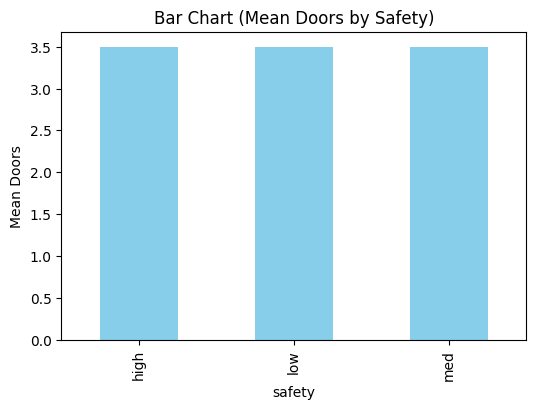

In [ ]:
# -------------------------------
# 3. Categorical vs. Continuous
# -------------------------------

# Example: Safety (categorical) vs Doors (continuous numeric)
# Bar Chart with summary statistics
plt.figure(figsize=(6,4))
df.groupby("safety")["doors"].mean().plot(kind="bar", color="skyblue")
plt.title("Bar Chart (Mean Doors by Safety)")
plt.ylabel("Mean Doors")
plt.show()

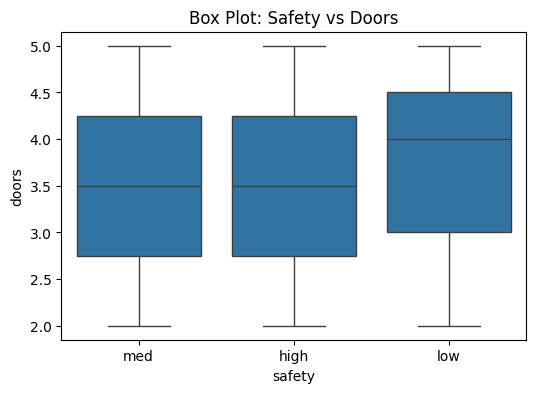

In [ ]:
# Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="safety", y="doors")
plt.title("Box Plot: Safety vs Doors")
plt.show()


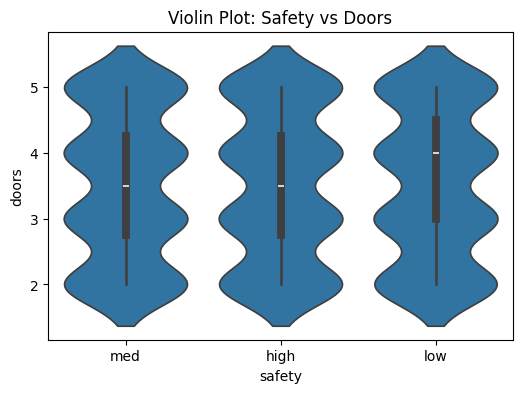

In [ ]:
# Violin Plot
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x="safety", y="doors")
plt.title("Violin Plot: Safety vs Doors")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


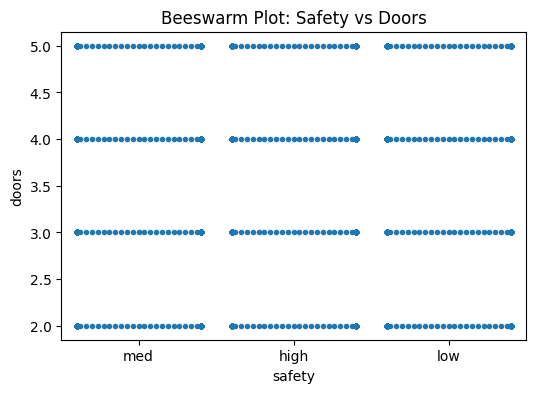

In [ ]:
# Beeswarm Plot
plt.figure(figsize=(6,4))
sns.swarmplot(data=df, x="safety", y="doors", size=4)
plt.title("Beeswarm Plot: Safety vs Doors")
plt.show()

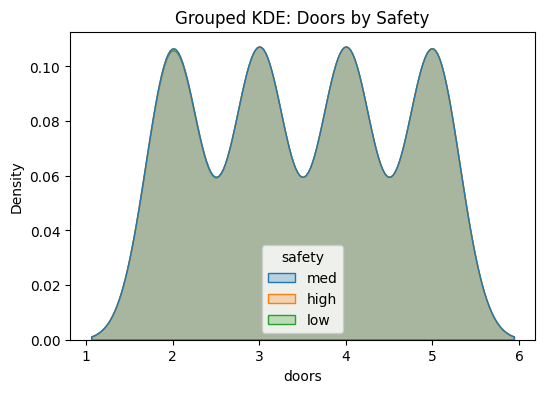

In [ ]:
# Kernel Density Plot
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="doors", hue="safety", fill=True)
plt.title("Grouped KDE: Doors by Safety")
plt.show()

<Figure size 800x600 with 0 Axes>

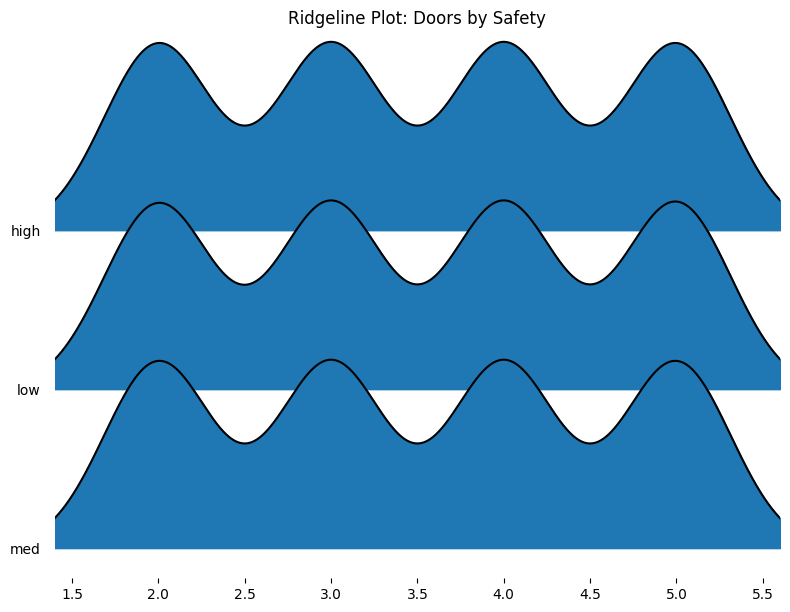

In [ ]:
# Ridgeline Plot (using joypy library)
from joypy import joyplot
plt.figure(figsize=(8,6))
joyplot(df, by="safety", column="doors", figsize=(8,6))
plt.title("Ridgeline Plot: Doors by Safety")
plt.show()

In [ ]:
%pip install joypy